Train Models to Predict EngagementLevel

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# -----------------------------------------------------
# Load transformed dataset
# -----------------------------------------------------
df = pd.read_csv("../data/processed/gaming_data_processed.csv")



In [11]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,purchases_per_session,playtime_per_week,achievement_rate
0,9000,1.096023,1,2,4,0.614176,-0.501334,2,-0.602363,0.269487,1.026459,0.032814,1,0.000000,97.626713,0.316456
1,9001,-0.297969,0,3,4,-0.939816,-0.501334,2,-0.775865,1.004019,-1.352160,-1.006648,1,0.000000,27.629807,0.909091
2,9002,-0.994965,0,3,3,-0.549654,-0.501334,0,1.132666,0.963212,-0.512647,1.141573,2,0.000000,131.580084,1.171429
3,9003,0.299456,1,3,0,-0.977506,1.994676,0,-0.081854,-0.199798,0.256906,1.557358,1,0.111111,47.388161,0.824561
4,9004,0.100314,1,1,0,0.507275,-0.501334,2,-1.296374,0.738771,1.586134,0.864383,1,0.000000,31.063889,0.389474


In [10]:
df.describe()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,purchases_per_session,playtime_per_week,achievement_rate
count,40034.000000,4.003400e+04,40034.000000,40034.000000,40034.000000,4.003400e+04,4.003400e+04,40034.00000,4.003400e+04,4.003400e+04,4.003400e+04,4.003400e+04,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,-7.844829e-17,0.598466,1.695409,2.001049,2.857506e-17,-2.023327e-17,0.80007,1.490873e-16,-1.409229e-16,-3.194727e-17,8.439403e-17,1.000300,0.045342,113.746400,1.279607
std,11556.964675,1.000012e+00,0.490215,1.189780,1.415431,1.000012e+00,1.000012e+00,0.87179,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.718383,0.154041,103.310324,3.372445
min,9000.000000,-1.691961e+00,0.000000,0.000000,0.000000,-1.738978e+00,-5.013344e-01,0.00000,-1.643379e+00,-1.730074e+00,-1.701956e+00,-1.699622e+00,0.000000,0.000000,0.000000,0.000000
25%,19008.250000,-8.953939e-01,0.000000,1.000000,1.000000,-8.614969e-01,-5.013344e-01,0.00000,-9.493682e-01,-8.731195e-01,-8.624440e-01,-8.680529e-01,0.000000,0.000000,28.383614,0.240741
50%,29016.500000,7.436599e-04,1.000000,1.000000,2.000000,-2.366490e-03,-5.013344e-01,1.00000,-8.185412e-02,4.238833e-03,-2.293155e-02,3.281390e-02,1.000000,0.000000,84.059480,0.500000
75%,39024.750000,8.968812e-01,1.000000,3.000000,3.000000,8.589806e-01,-5.013344e-01,2.00000,7.856600e-01,8.611935e-01,8.515606e-01,8.643833e-01,2.000000,0.000000,174.452112,0.978723
max,49033.000000,1.693448e+00,1.000000,3.000000,4.000000,1.731888e+00,1.994676e+00,2.00000,1.653174e+00,1.718148e+00,1.726053e+00,1.695953e+00,2.000000,1.000000,455.893133,49.000000


In [9]:
df.dtypes

PlayerID                       int64
Age                          float64
Gender                         int64
Location                       int64
GameGenre                      int64
PlayTimeHours                float64
InGamePurchases              float64
GameDifficulty                 int64
SessionsPerWeek              float64
AvgSessionDurationMinutes    float64
PlayerLevel                  float64
AchievementsUnlocked         float64
EngagementLevel                int64
purchases_per_session        float64
playtime_per_week            float64
achievement_rate             float64
dtype: object

In [4]:
# Shape of dataset
print("Shape:", df.shape)
# Preview
print(df.head())
# Basic info
print(df.info())

Shape: (40034, 16)
   PlayerID       Age  Gender  Location  GameGenre  PlayTimeHours  \
0      9000  1.096023       1         2          4       0.614176   
1      9001 -0.297969       0         3          4      -0.939816   
2      9002 -0.994965       0         3          3      -0.549654   
3      9003  0.299456       1         3          0      -0.977506   
4      9004  0.100314       1         1          0       0.507275   

   InGamePurchases  GameDifficulty  SessionsPerWeek  \
0        -0.501334               2        -0.602363   
1        -0.501334               2        -0.775865   
2        -0.501334               0         1.132666   
3         1.994676               0        -0.081854   
4        -0.501334               2        -1.296374   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                   0.269487     1.026459              0.032814   
1                   1.004019    -1.352160             -1.006648   
2                   0.963212    -0

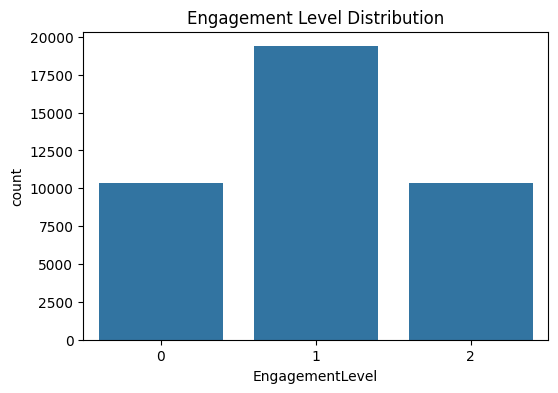

In [6]:
# 1. Distribution of EngagementLevel
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="EngagementLevel")
plt.title("Engagement Level Distribution")
plt.show()

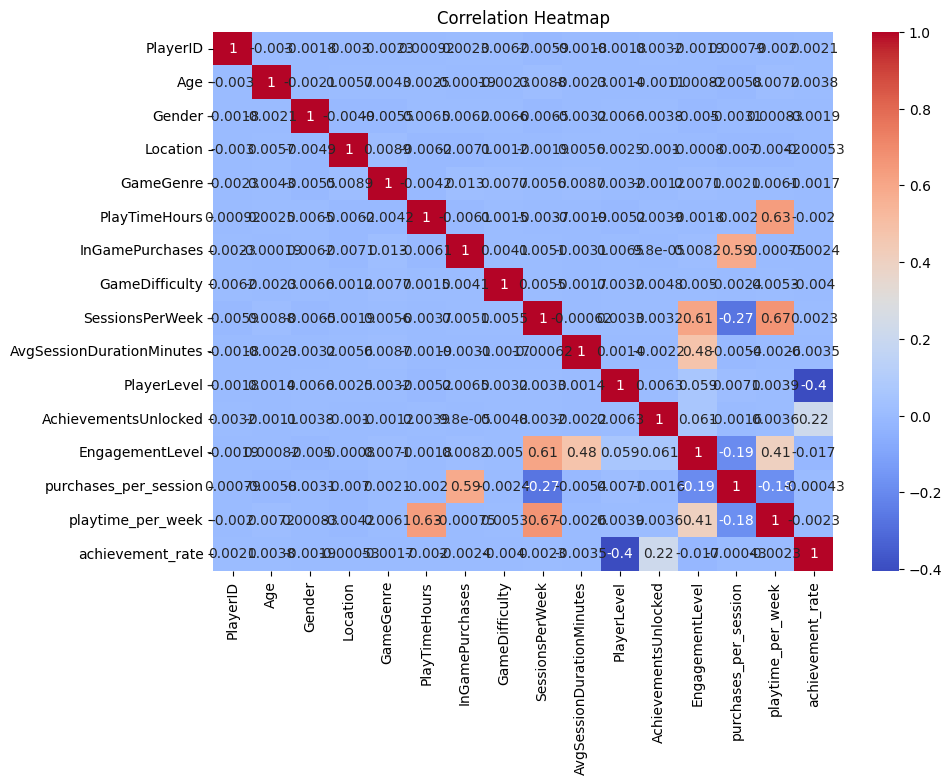

In [7]:
# 2. Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

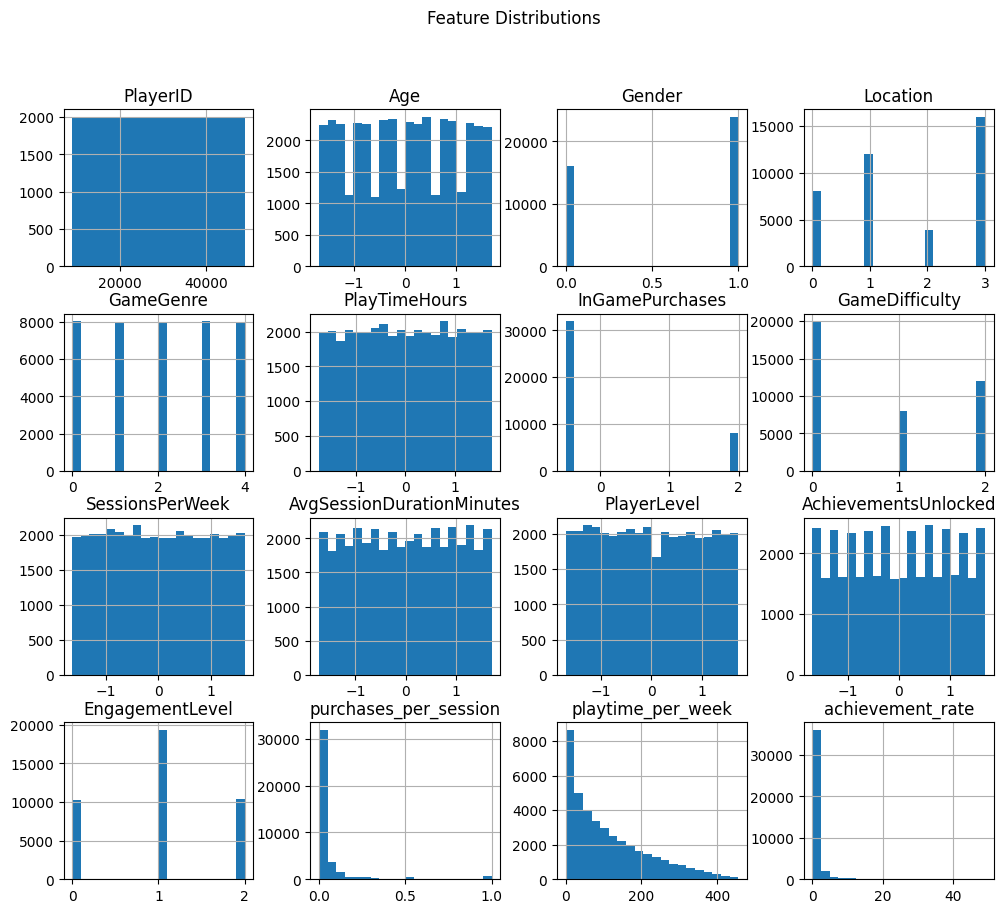

In [8]:
# 3. Numeric features distribution
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()